In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.manifold import TSNE

In [2]:
#Import Dataset
df = pd.read_csv("./Data/cleaned_data.csv", delimiter = '\t')
df

,Player,Tm,PTS,Age,G,GS,MP,FG,FGA,FG%,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,Precious Achiuwa,NYK,5.2,-0.635196,0.206292,-0.315059,0.032834,-0.265682,-0.331798,0.435515,...,-0.136166,-0.539862,1.715319,-0.366901,0.246799,-0.605531,-0.277504,1.987459,-0.591965,0.521759
1,Bam Adebayo,MIA,22.6,-0.195287,-0.526429,0.200930,1.376889,2.154425,2.038275,0.473375,...,1.154829,0.363192,1.496885,1.984685,1.998319,0.998600,-0.277504,-0.830641,0.663333,1.215277
2,Nickeil Alexander-Walker,MIN,7.3,-0.415242,1.488553,-0.487055,0.271777,-0.166225,0.025336,-0.224329,...,-0.505022,1.148218,-0.578238,-0.541093,-0.561594,0.246663,0.123752,0.036467,-0.068924,-0.085069
3,Grayson Allen,PHO,3.5,0.244623,-1.075970,-0.315059,0.114970,-0.862421,-0.705166,-1.122148,...,0.140475,1.148218,0.186281,0.155674,0.179433,-0.405015,-0.076876,-0.830641,0.558725,0.348380
4,Jarrett Allen,CLE,17.0,-0.415242,-0.709609,0.028934,0.884069,1.060404,0.398704,1.452323,...,2.215289,0.302805,3.244357,3.204025,3.480375,-0.254628,1.528145,1.337129,0.349509,0.348380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Jaylin Williams,OKC,4.4,-1.295060,0.389472,-0.659052,-0.542123,-0.497747,-0.575299,0.419289,...,-0.597236,0.462006,-0.469021,0.068578,-0.090031,-0.154370,-0.277504,-0.180310,-0.696573,-0.431829
210,Kenrich Williams,OKC,0.6,0.464577,-0.160069,-0.659052,-1.146948,-0.928725,-0.932433,-0.851721,...,-0.781664,-1.596628,-0.796672,-0.715284,-0.797376,-0.705790,-0.879387,-0.830641,-1.010398,-1.038657
211,Delon Wright,MIA,8.0,0.904487,-0.709609,-0.487055,0.510720,-0.033617,-0.299331,1.041273,...,-0.551129,1.148218,-0.359804,-0.062066,-0.157398,-0.003982,0.926262,-0.180310,-1.010398,-0.258449
212,Thaddeus Young,PHO,0.0,1.784306,-1.259150,-0.659052,-1.191750,-1.028181,-1.111000,-2.203859,...,-0.781664,-1.596628,-0.905889,-1.150763,-1.167890,-0.906306,-1.080014,-0.830641,-1.010398,-1.385416


### Using features (not including Player and Tm) to create t-SNE with two features

In [3]:
#Initialize t-SNE model, transform the data, and turn resulting data into a dataframe
tsne = TSNE(n_components=2, random_state=56)
components = tsne.fit_transform(df.iloc[:, 3:])
components = pd.concat([df[['Player', 'Tm']], pd.DataFrame(components)], axis=1)
components = components.rename(columns={0: "t-SNE Component 1", 1: "t-SNE Component 2"})
components

,Player,Tm,t-SNE Component 1,t-SNE Component 2
0,Precious Achiuwa,NYK,2.263795,-4.729297
1,Bam Adebayo,MIA,-9.448302,-10.196461
2,Nickeil Alexander-Walker,MIN,1.716035,-1.501104
3,Grayson Allen,PHO,6.586276,0.954014
4,Jarrett Allen,CLE,-10.583359,-8.392105
...,...,...,...,...
209,Jaylin Williams,OKC,1.484092,0.317303
210,Kenrich Williams,OKC,4.671890,10.227260
211,Delon Wright,MIA,-1.921385,1.013279
212,Thaddeus Young,PHO,9.240457,17.129250


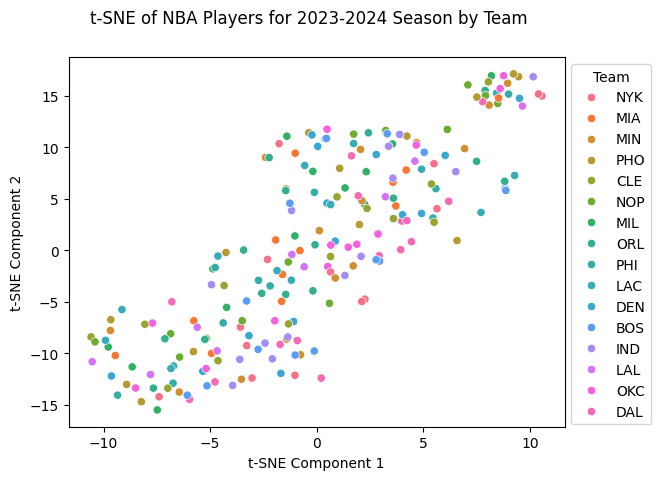

In [4]:
sns.scatterplot(data = components, x = "t-SNE Component 1", y = "t-SNE Component 2", hue = 'Tm')
plt.legend(title = 'Team', loc='upper left', bbox_to_anchor=(1, 1))
plt.suptitle("t-SNE of NBA Players for 2023-2024 Season by Team")
plt.savefig("./Figures/t-SNE/NBA_Players_By_Team.png", dpi=100, bbox_inches = "tight")

### The results indicate that player performance is not tied to teams. We will now see if the players are in fact clustered by PTS

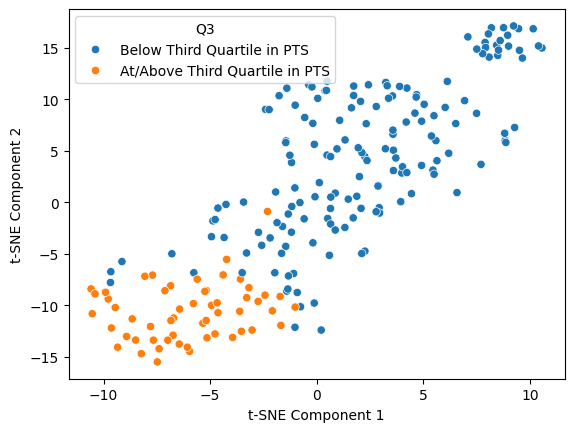

In [5]:
#Using Upper Quartile of PTS as cut-off point for Great Players
Q3 = df['PTS'].quantile(0.75)

#Function to add relation to Q3 value for each player
def add_Q3(pts):
    if pts >= Q3:
        return "At/Above Third Quartile in PTS"
    else:
        return "Below Third Quartile in PTS"

#Adding Q3 value to components, and using Q3 as label    
components['Q3'] = df['PTS'].apply(add_Q3)
sns.scatterplot(data = components, x = "t-SNE Component 1", y = "t-SNE Component 2", hue = 'Q3')
plt.savefig("./Figures/t-SNE/Great_vs_Other_Players.png", dpi=100, bbox_inches = "tight")

### We will now find the best player based on Points per game, locate this player's datapoint in the t-SNE, and use the nearby datapoints to this datapoint to form the "All Star Team" of 15 players

In [16]:
print(f"Statistically Best Player: {df.loc[df['PTS'] == np.max(df['PTS'])]['Player'][46]}")

Statistically Best Player: Joel Embiid


### Unsurprisingly, Joel Embiid is the "Best" player. We will locate him within the t-SNE clusters, and pick players near him to form our All Star Team

Joel Embiid's Coordinates: (-9.339038848876953, -14.047821044921875)


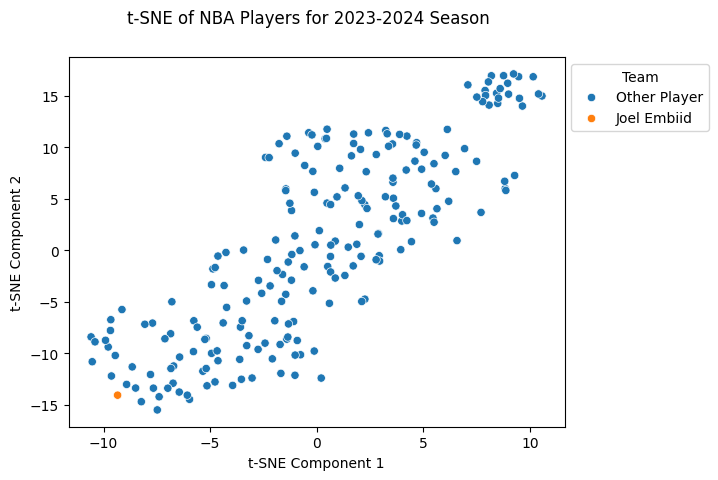

In [17]:
def is_joel(name):
    if name == "Joel Embiid":
        return "Joel Embiid"
    else:
        return "Other Player"
components["Is_Joel"] = components["Player"].apply(is_joel)

sns.scatterplot(data = components, x = "t-SNE Component 1", y = "t-SNE Component 2", hue = 'Is_Joel')
plt.legend(title = 'Team', loc='upper left', bbox_to_anchor=(1, 1))
plt.suptitle("t-SNE of NBA Players for 2023-2024 Season")

embiid_tsne_1 = components.loc[components['Player'] == 'Joel Embiid']['t-SNE Component 1'][46]
embiid_tsne_2 = components.loc[components['Player'] == 'Joel Embiid']['t-SNE Component 2'][46]
print(f"Joel Embiid's Coordinates: ({embiid_tsne_1}, {embiid_tsne_2})")
plt.savefig("./Figures/t-SNE/Embiid_Discovery.png", dpi=100, bbox_inches = "tight")

In [7]:
#Gathers Player Data Relative to Embiid
closest_embiid = list()

for row in range(len(components)):  
    #Get Each Player Data and check Euclidean distance of points from Embiid's
    player_data = components.iloc[row]
    (dist_1, dist_2) = (player_data['t-SNE Component 1'], player_data['t-SNE Component 2'])
    dist = math.dist((embiid_tsne_1, embiid_tsne_2), (dist_1, dist_2))
    closest_embiid.append({"Player": player_data['Player'], "Location": (dist_1, dist_2), "Distance From Embiid": dist})

#Turning data into Dataframe and grabbing top 15 players by proximity
closest_embiid = pd.DataFrame(closest_embiid)
closest_embiid = closest_embiid.sort_values(by='Distance From Embiid').head(15)
closest_embiid

,Player,Location,Distance From Embiid
46,Joel Embiid,"(-9.339039, -14.047821)",0.000000
56,Shai Gilgeous-Alexander,"(-8.493037, -13.356337)",1.092643
44,Kevin Durant,"(-8.915343, -13.002746)",1.127697
20,Devin Booker,"(-8.2262945, -14.680645)",1.280104
10,Paolo Banchero,"(-7.659001, -13.366831)",1.812809
97,Nikola Joki?,"(-9.628781, -12.18698)",1.883263
27,Jalen Brunson,"(-7.3902435, -14.202019)",1.954886
109,Damian Lillard,"(-7.476208, -15.479383)",2.349364
133,Donovan Mitchell,"(-6.9823213, -13.370404)",2.452144
92,LeBron James,"(-7.794879, -12.041857)",2.531466


### Now, we will use these names to filter the original dataframe (df) and save that data as a .csv

In [9]:
#Filtering df for just the "Best" players
all_star_df = pd.concat([df, closest_embiid], join = "inner",axis = 1)
all_star_df = all_star_df.iloc[:, :-3]

all_star_df.to_csv("./Data/all_stars.csv", sep = '\t', index = False)
all_star_df

,Player,Tm,PTS,Age,G,GS,MP,FG,FGA,FG%,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
10,Paolo Banchero,ORL,27.0,-1.295060,-0.160069,0.544923,1.302219,2.187577,2.346709,0.262441,...,2.445823,0.475731,1.278451,1.723397,1.728855,1.098858,1.126890,0.470021,3.801580,0.348380
20,Devin Booker,PHO,27.5,0.024668,-0.709609,0.028934,1.608365,1.623991,1.535040,0.457149,...,3.967353,1.013720,-0.578238,0.155674,-0.056348,2.101440,2.531283,-0.180310,1.918632,2.515624
27,Jalen Brunson,NYK,32.4,0.024668,0.939012,1.576901,1.481427,2.817468,3.142145,0.197539,...,3.460177,0.530627,-0.250587,0.025030,-0.056348,2.853377,0.525007,-0.397087,1.814024,0.348380
42,Luka Don?i?,DAL,28.9,-0.635196,2.587634,3.124869,1.563563,2.353338,2.606443,0.208356,...,2.445823,0.503179,-0.141370,2.637903,2.032002,3.154151,2.731911,0.036467,3.278539,0.781829
44,Kevin Durant,PHO,26.8,1.784306,-0.709609,0.028934,1.645700,2.054969,1.616207,0.781662,...,3.137428,0.665125,-0.578238,1.592754,1.021510,0.747954,-0.076876,2.421013,1.604807,0.348380
45,Anthony Edwards,MIN,27.6,-1.075106,1.488553,2.092891,1.541162,2.220729,2.184375,0.397655,...,2.169182,0.637676,0.295498,1.418562,1.189925,2.352086,1.929400,0.470021,2.441673,0.608449
46,Joel Embiid,PHI,33.0,0.464577,-0.343249,0.372927,1.593431,2.220729,2.492810,0.197539,...,5.212241,0.761194,2.589055,2.202424,2.469882,1.951053,1.327517,2.421013,3.383147,1.475347
56,Shai Gilgeous-Alexander,OKC,30.2,-0.415242,0.389472,1.060912,1.488894,2.651707,2.525276,0.478783,...,2.953000,0.571800,-0.032153,1.636302,1.257292,2.301957,1.528145,2.854567,1.290983,1.301967
92,LeBron James,LAL,27.8,2.664124,-0.526429,0.200930,1.556096,2.684859,2.103209,0.857382,...,1.339256,0.431813,-0.032153,1.462110,1.122559,3.505055,3.735049,1.337129,2.964714,0.521759
97,Nikola Joki?,DEN,28.7,0.244623,0.755832,1.404905,1.511294,2.651707,2.184375,0.743802,...,1.938647,0.876478,3.025923,3.116930,3.345642,3.454926,1.728773,0.686798,2.441673,0.955208
